# IDS Assignment Part 1 - <font color="red"><h7>Deadline: 18/12/2022 23:59</h7></font>
This is the first part of the assignments in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. This is the _only_ file that is required. A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and IDs:
    
    1. 
    
    2. 
    
    3.

For those using Jupyter Notebook in your local environments, please install the following library in your environment:
```pip install umap-learn==0.5.3```

In [29]:
#your imports (only use libraries provided in the environment)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from p_decision_tree.DecisionTree import DecisionTree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

# Pricing your AirBnB

You finally made it! Working as a data scientist at an established process mining company in New York, you earned so much money that you can buy a flat for yourself. You decide to buy a 2-room apartment in Manhattan. Congratulations!

Currently, you are still living in your rental apartment and are tied to a long-running rental contract. You can only use the apartment in 5 years from now. Therefore, you want to use the apartment as an AirBnB in the meantime, generating some consistent income. 


You have no clue how you should price your AirBnB per night (you are living in New York, so you never needed to book an AirBnB). You decide to leverage your unique skill set and perform a data-driven, informed decision. You collect all the data you can get your hands on by traversing all New York apartments. The retrieved data set **AirBnB_original.csv** is your starting point for investigation.

## Question 1: Exploring the Data Set

As with every data set, you first want to know what you are dealing with. You perform some exploratory data analysis and clean the data along the way.

Show a few data points contained in the data set. Include all attributes.

In [30]:
# Your answer goes here
airbnb_df = pd.read_csv('./AirBnB_original.csv')
airbnb_df.head(10)

,id,host id,neighborhood group,neighborhood,lat,long,country,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms
0,1001254,80014485718,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,193.0,7.0,9.0,4.0,6.0,1
1,1002102,52335172823,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,28.0,7.0,45.0,4.0,2.0,2
2,1002403,78829239556,Manhattan,Harlem,40.80902,-73.94190,United States,US,0,flexible,Private room,2005.0,620,124.0,3.0,0.0,5.0,1.0,1
3,1002755,85098326012,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,0,moderate,Entire home/apt,2005.0,368,74.0,7.0,270.0,4.0,1.0,2
4,1003689,92037596077,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,41.0,7.0,9.0,3.0,1.0,1
5,1004650,61300605564,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2015.0,71,14.0,7.0,49.0,5.0,1.0,1
6,1005202,90821839709,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009.0,1060,212.0,7.0,49.0,5.0,1.0,1
7,1005754,79384379533,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,US,0,strict,Private room,2005.0,1018,204.0,2.0,430.0,3.0,1.0,1
8,1006859,1280143094,Manhattan,Chinatown,40.71344,-73.99037,United States,US,0,flexible,Entire home/apt,2004.0,319,64.0,1.0,160.0,3.0,4.0,1
9,1007411,18824631834,Manhattan,Upper West Side,40.80316,-73.96545,United States,US,0,flexible,Entire home/apt,2008.0,606,121.0,5.0,53.0,4.0,1.0,2


### Basic Cleaning

First, you have to remove NaN entries across the data set such that we only keep rows without any NaN value. How many rows did you remove?

In [31]:
# Your answer goes here
cleaned_df = airbnb_df.dropna(axis=0)
# Get the number of rows in the original dataset
original_size = airbnb_df.shape[0]
# Get the number of rows after cleaning the dataset
cleaned_size = cleaned_df.shape[0]
# Get the number of rows removed after cleaning the dataset
removed_nan_count = original_size - cleaned_size
print(f"Number of rows with NaN values removed: {removed_nan_count}")

Number of rows with NaN values removed: 1477


Since duplicated entries are misleading, we want to remove duplicate flats (identified by their id), such that we only keep them once and create a new dataset. How many duplicates are removed?

In [32]:
# Your answer goes here
dup_removed_df = cleaned_df.drop_duplicates(subset=['id'])
dup_removed_count = cleaned_size - dup_removed_df.shape[0]
print(f"Number of duplicates removed: {dup_removed_count}")

Number of duplicates removed: 389


From now on, you work with the dataset **AirBnB_cleaned.csv**.

To get a feeling for nightly prices in New York, you take a look at the price attribute. Calculate the average price, the first and third quantiles, and the standard deviation.

In [33]:
# Your answer goes here

# Read the cleand dataset
airbnb_cleaned_df = pd.read_csv("./AirBnB_cleaned.csv")

criteria = {'mean': 'Mean', '25%': 'First Quantile', '75%': 'Third Quantile', 'std': 'Standard Deviation'}
# Get all the required criteria by using the describe function
info = airbnb_cleaned_df['price'].describe()
# Print out the criteria specified in the subtask
for criterion in criteria:
    print(f"{criteria[criterion]}: {info[criterion]}")

# """Alternative Approach"""
# price_df = airbnb_cleaned_df['price']
# price_avg = price_df.mean()
# price_std = price_df.std()
# first_quantile = price_df.quantile(0.25)
# third_quantile = price_df.quantile(0.75)
# print(f"Average Price: {price_avg}")
# print(f"Standard Deviation of Price: {price_std}")
# print(f"First Quantile: {first_quantile}")
# print(f"Third Quantile: {third_quantile}")

Mean: 625.4636797380085
First Quantile: 340.0
Third Quantile: 913.0
Standard Deviation: 331.23624102553555


You want to get a more visual picture of the price range. Use a histogram and boxplot to show the distribution of prices on the entire dataset.

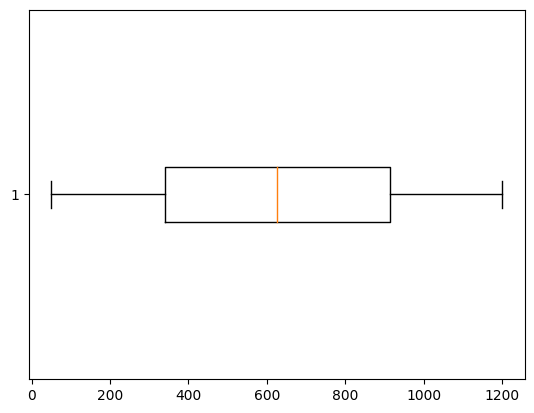

In [34]:
# Your answer goes here
# Draw the boxplot for the price
plt.boxplot(airbnb_cleaned_df['price'], vert=False);

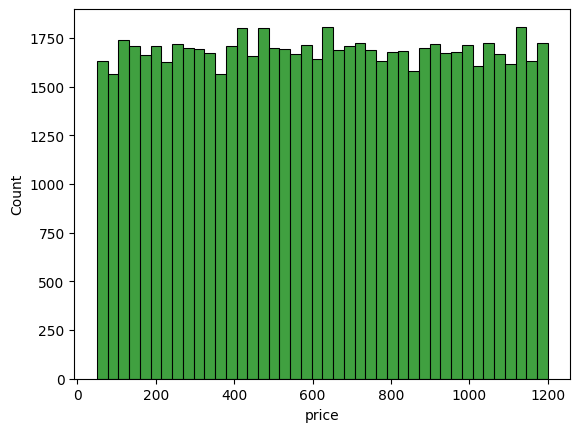

In [35]:
# Draw the histogram based on the price feature (Indicating the count)
sns.histplot(data=airbnb_cleaned_df, x="price", color='g');

### Exploring Price Relationships

To inform our pricing decision, we want to investigate some differentiating factors for pricing apartments.

Since you have an overview of the prices and their distribution, you want to investigate which features of your dataset you might use to make your pricing decision. To do so, discuss each feature of the dataset and already rule out features that will definitely not impact the pricing decision. Below you can find a brief description of each feature: 

- id: Unique identifier for an apartment
- host id: Identifier of the host offering a certain apartment
- neighborhood group: Name of a neighborhood group in which an apartment is located
- neighborhood: More fine-grained view on neighborhoods than neighborhood group
- lat: Latitude coordinate of an apartment
- long: Longitude coordinate of an apartment
- country: The country in which an apartment is located
- country code: Code of the country in which an apartment is located
- instant bookable: Boolean values if an apartment is instantly bookable
- cancellation policy: Policy for cancellation of booking
- room type: Type of apartment/room
- construction year: Year of construction of apartment
- price: Price for renting an apartment
- service fee: Fee of service
- minimum nights: Number of minimum nights to rent an apartment
- number of reviews: Number of reviews for an apartment
- review rate number:  Review rate for an apartment (1 to 5)
- calculated host listings count: Number of listings a host has
- number rooms: Number of rooms in an apartment

### **Inquiries/Considerations:**
1. Converting categorical features to numerical by one hot encoding

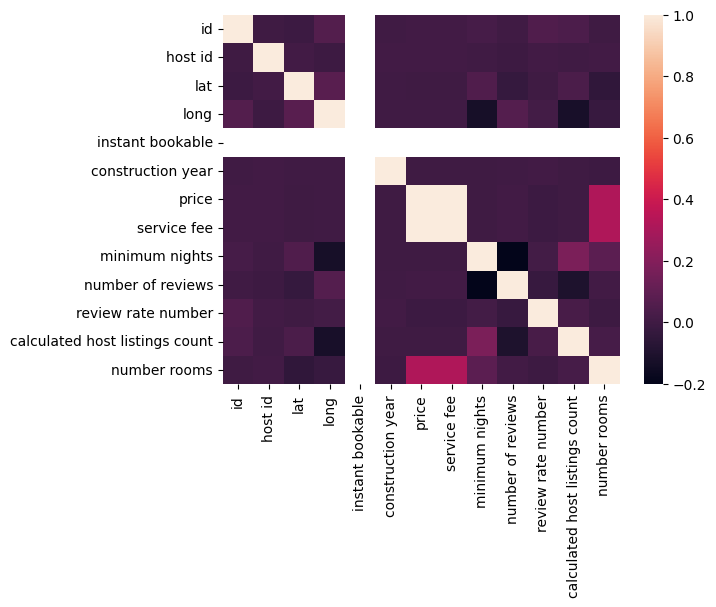

In [36]:
# Your answer goes here
sns.heatmap(airbnb_cleaned_df.corr());

_Answer:_ 

## Discussion on relevant and Irrelevant Features
Because the descriptive features 'id' and 'host id' have unique values and are only used as an identifier, they do not provide us with any useful information. All the instances have the same country and country code, i.e. US, they will not have any effect on our estimation of the price value. The feature 'instant bookable' also has one unique value, which is zero; therefore, it won't play a role on price estimation. Based on the correlation heatmap that we drew, the number of rooms and the service fee seem to be positively correlated with the price value.

### Univariate Analysis

In the following, you want to analyze which features influence the price. You do this univariately, i.e., look at the relationship between one feature and the price individually. No matter which features you concluded to be useful in the last task, **you will consider the following seven features: service fee, minimum nights, neighborhood group, room type, cancellation policy, construction year, and the number of rooms.**

First, we look closely at the relationship between price and service fee. To do so, create a joint plot for these two attributes. What is your finding? Is this a helpful feature for our pricing decision?

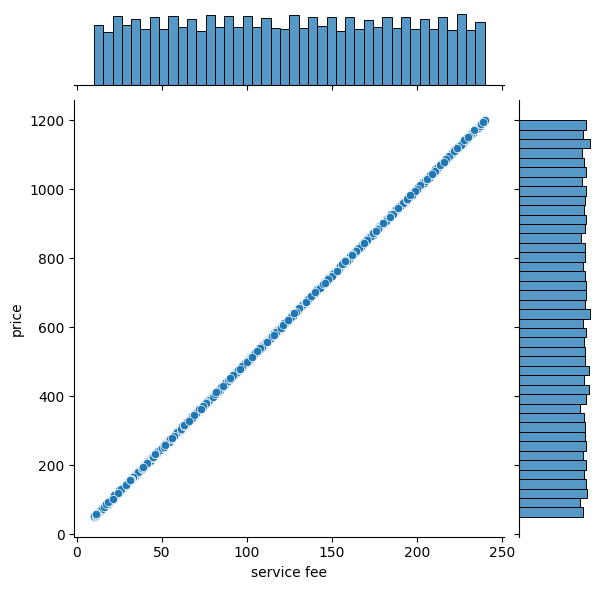

In [37]:
# Your answer goes here
sns.jointplot(data=airbnb_cleaned_df, x='service fee', y='price',kind='scatter');

In [38]:
# sns.jointplot(data=airbnb_cleaned_df, x='neighborhood group', y='price',kind='scatter');
# airbnb_cleaned_df.plot.scatter(x='neighborhood group', y='price', c='construction year', colormap='viridis')

_Answer:_

## Service Fee and Price Correlation

Yes, this seems to be a useful feature for pricing decision because there's a **positive correlation** between the **service fee** and the **price** based on the plot drawn above.

Next, we are interested in the relationship between the number of minimum nights and the price. To analyze it, create a joint plot with a regression. Describe your observation.

                minimum nights     price
minimum nights        1.000000 -0.001062
price                -0.001062  1.000000


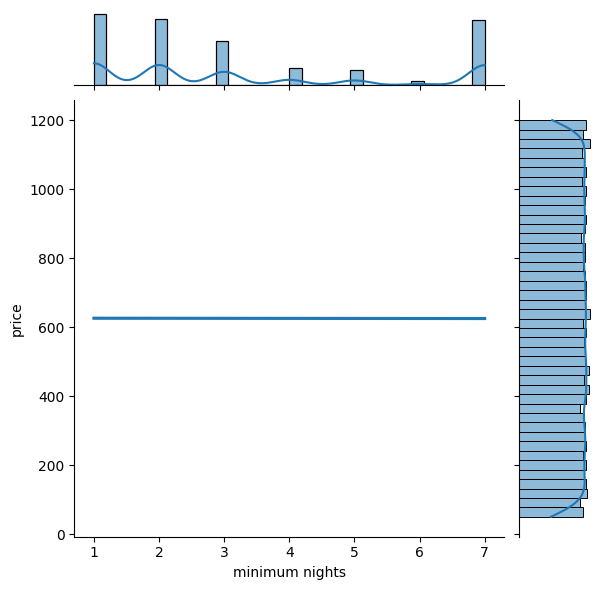

In [39]:
# Your answer goes here
# Get the correlation result to further interpret along with the jointplot
corr_result = airbnb_cleaned_df[['minimum nights', 'price']].corr()
print(corr_result)
sns.jointplot(data=airbnb_cleaned_df, x='minimum nights', y='price', kind='reg', scatter=False);

_Answer:_

## Minmum nights and Price Correlation

Based on the correlation calculated and the plot, we observe than there's **no strong correlation between** 'minimum nights' and 'price'.

To further investigate the pricing decision, you look at the remaining five features: neighborhood group, room type, cancellation policy, construction year, and the number of rooms.
To get an overview, you decide to create box plots (including the mean) for each of these features to visualize their influence on the price. Describe your findings. Which values of the features influence the price?

                         price
neighborhood group            
Bronx               633.111526
Brooklyn            627.011961
Manhattan           622.910088
Queens              627.530398
Staten Island       620.897856
                      price
room type                  
Entire home/apt  626.746453
Hotel room       673.530120
Private room     624.123952
Shared room      617.248443
                          price
cancellation policy            
flexible             627.179209
moderate             625.283740
strict               623.923844
                        price
construction year            
2003               620.278910
2004               629.814136
2005               619.081172
2006               635.333333
2007               628.347487
2008               637.354427
2009               622.021661
2010               622.420423
2011               624.198751
2012               620.310405
2013               619.979983
2014               635.503158
2015               617.074229
2016 

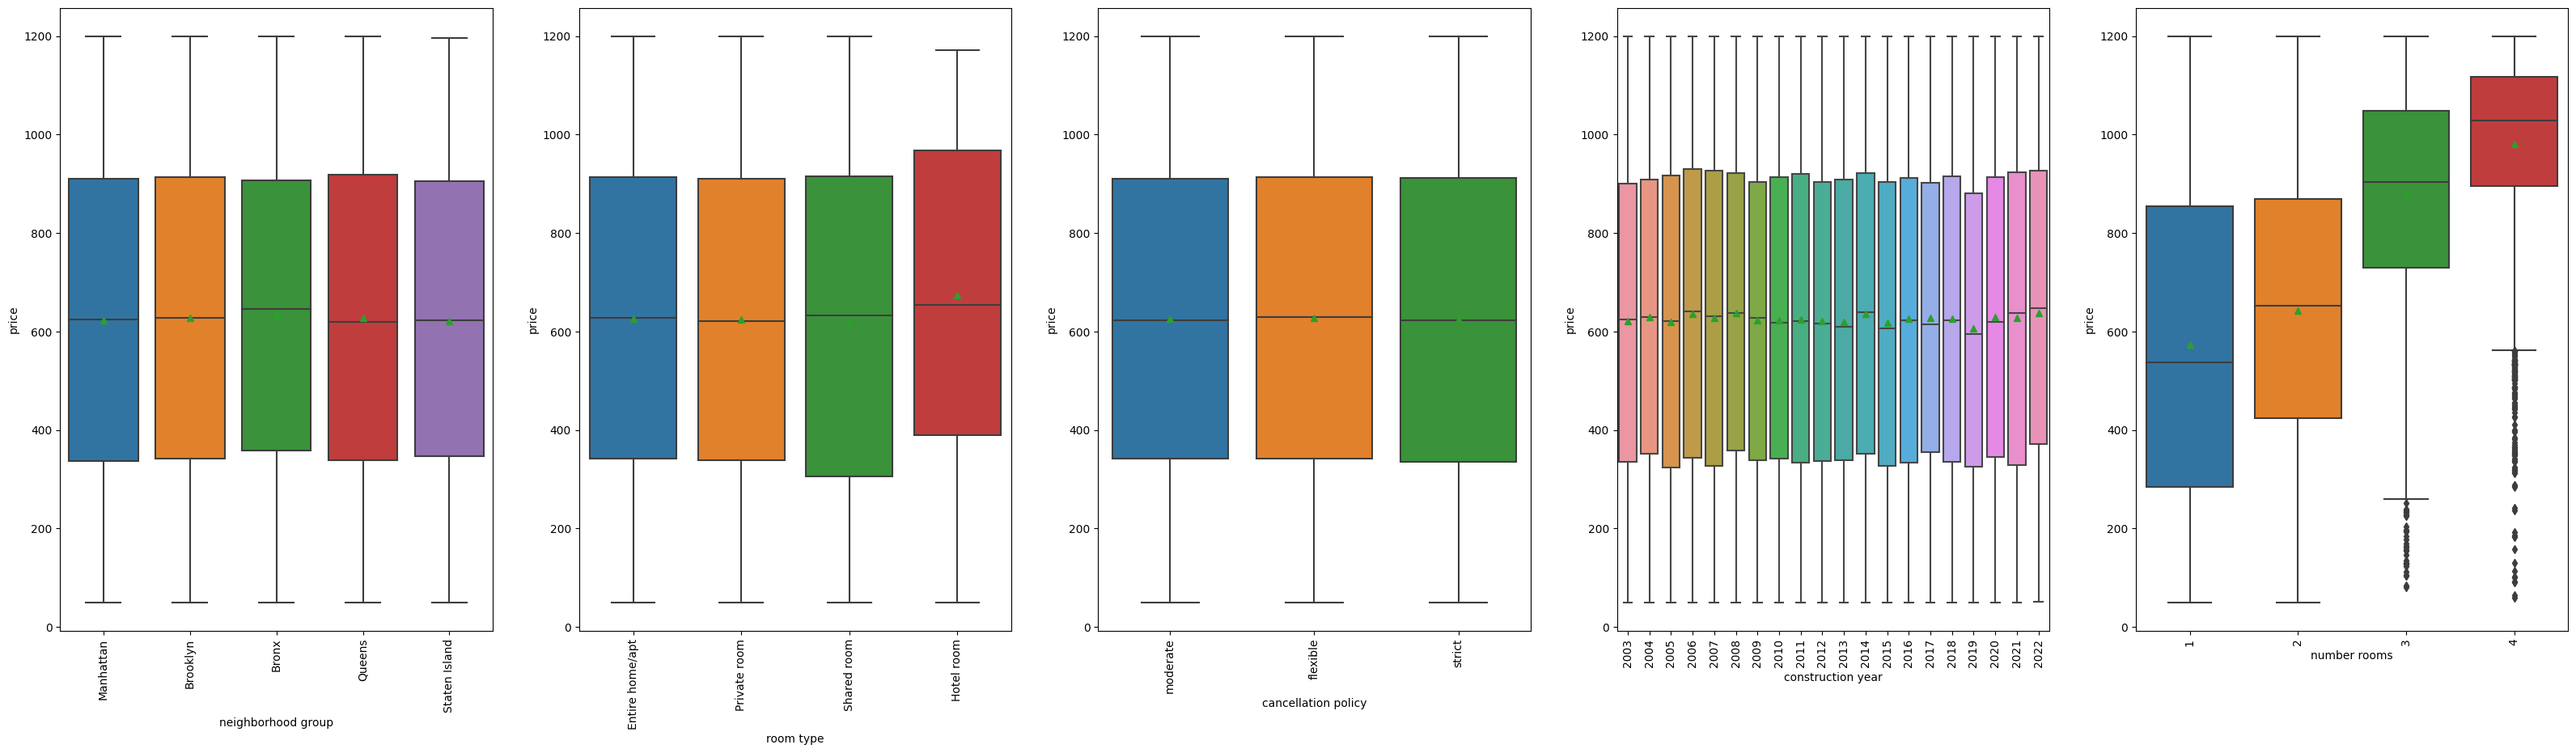

In [40]:
# Your answer goes here
features = ['neighborhood group', 'room type', 'cancellation policy', 'construction year', 'number rooms']
fig, axs = plt.subplots(1, len(features), figsize=(40, 10))
for index, feature in enumerate(features):
    print(airbnb_cleaned_df[[feature, 'price']].groupby(by=feature).mean())
    ax = sns.boxplot(data=airbnb_cleaned_df, x=feature, y='price', ax=axs[index], showmeans=True)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

_Answer:_

1. The feature **neighborhood group** does not have much influence on the price because there's not much variation in the price based on different values of this feature. However, there's a small variation in the price for **Bronx** neighborhood group (The mean value of price for **Bronx** is higher) and **Manhattan** and **Staten Island** (They have lower means for the price value).

2. The feature **room type** does not have much influence on the price because there's not much variation in the price based on different values of this feature. However, there's a small variation in the price for **Shared room** (results in lower prices based on the mean value) and **Hotel room** (results in higher prices based on the mean value).

3. The feature **cancellation policy** does not have much influence on the price because there's not much variation in the price based on different values of this feature. However, based on the mean aggregation, the more flexible the cancellation policy is, the higher the average price will be.

4. Based on the **construction year**, price values vary slightly for different years. However, the variation is small. For the years **2008**, **2014** and **2022**, we seem to have the highest prices, and for the year **2019**, we have the lowest mean price value.

5. The feature **number rooms** seems to have a considerable effect on price based on the boxplot and the correlation heatmap that we had already plotted. As it's clearly obvious from the boxplot, the prices (the mean value of the prices) tend to increase as the number of rooms increase.

### **Inquiries/Considerations:**

1. Check for Simpson's Paradox (Use previous and next task)

### Multivariate Analysis

As the univariate analysis of price relationships provided only limited insights, you decide to visualize some multivariate investigations of the price. **No matter what you concluded in the last section, you will use the features construction year, number of rooms, cancellation policy, room type, and neighborhood group in the multivariate analysis.**
For each pair of features, create a grouped boxplot (using the hue argument) and investigate whether the two features together allow for an explanation of price differences. In the end, conclude which combination of features should be used to make your pricing decision.

In [41]:
# Define utility finctions for plotting charts for the next subtasks
features = ["neighborhood group", "construction year", "number rooms", "cancellation policy", "room type"]
features_count = len(features)
plot_rows = (features_count - 1) // 2
plot_cols = (features_count - 1) // 2

def plot_boxes(x):
    fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(plot_cols * 20, plot_rows * 20))
    feats = [feature for feature in features if feature != x]
    for index, feature in enumerate(feats):
        sns.boxplot(ax=axes[index // plot_rows, index % plot_cols], data=airbnb_cleaned_df, x=x, y='price', hue=feature)
    fig.suptitle('Multivariate Analysis for {}'.format(x))

#### Multivariate Analysis for Neighborhood Group

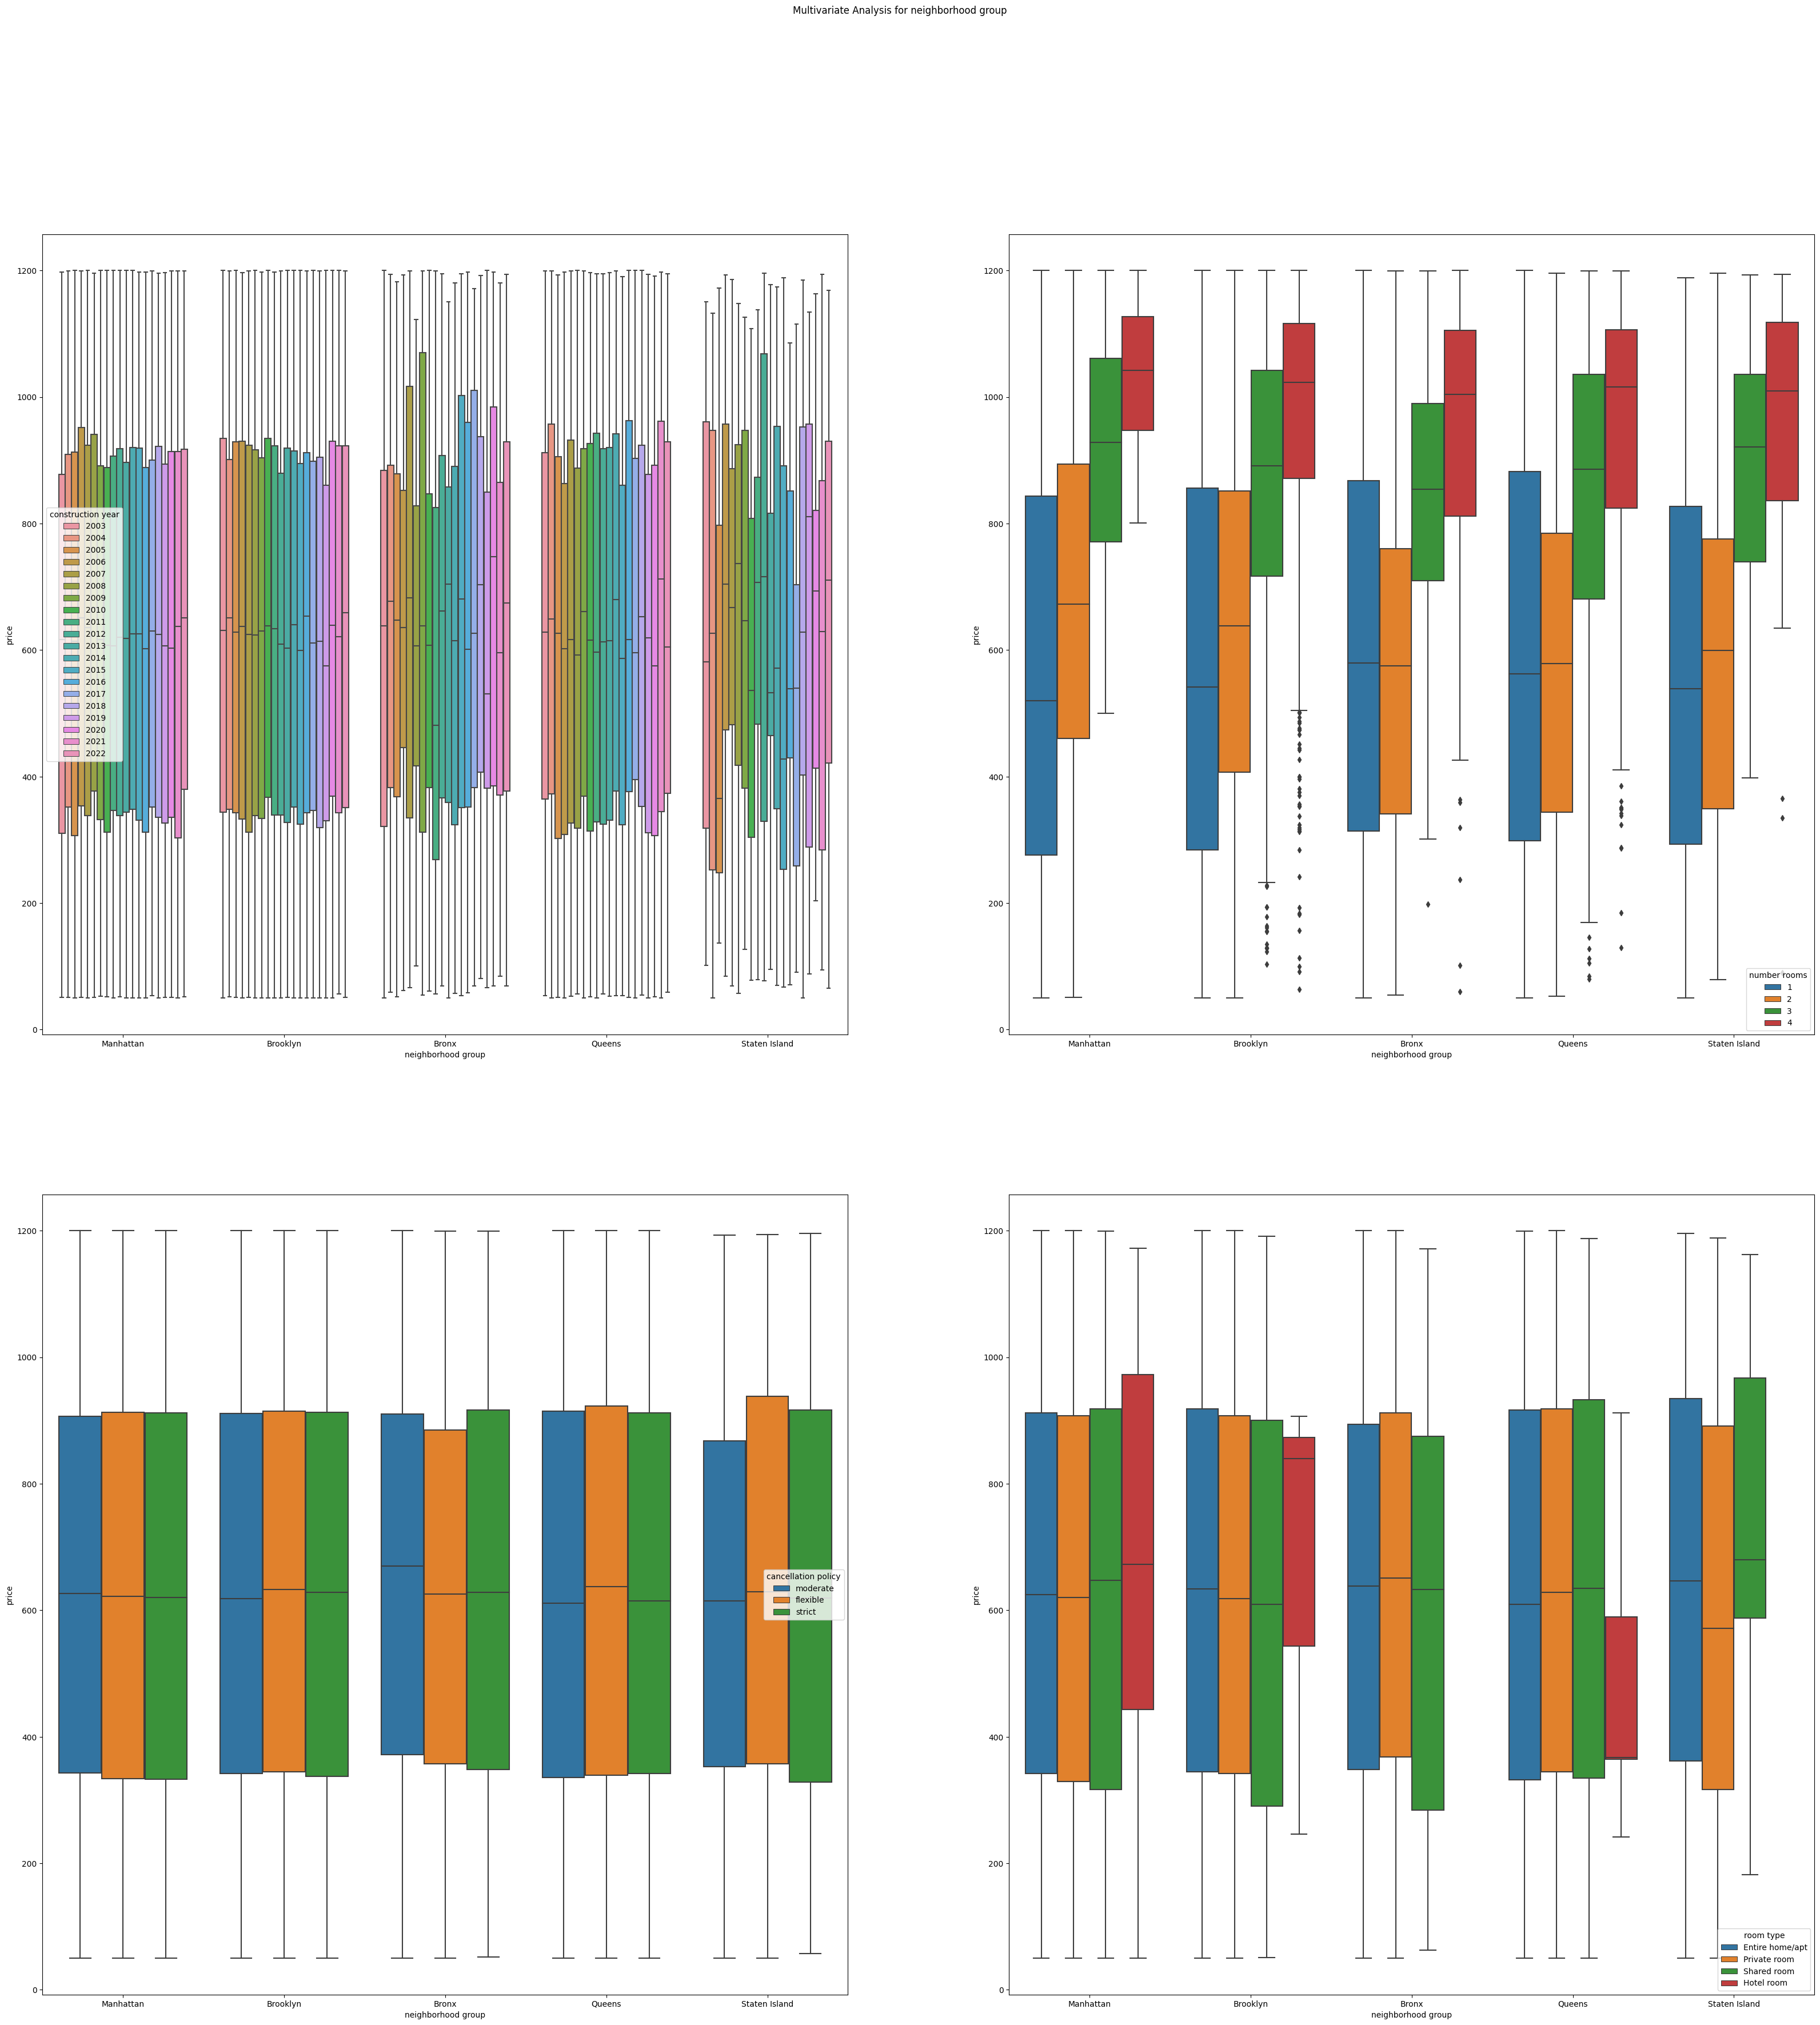

In [42]:
# Your answer goes here    
plot_boxes("neighborhood group")

_Answer:_ 

1. The combination of **number rooms** and **neighborhood group** has high variance. Hence, this combination could be used.
2. For the combination of **room type** and **neighborhood group**, the value *hotel room* for **room type** with **neighborhood group** yields high variance. Hence this combination could be used.

#### Multivariate Analysis for Room Type

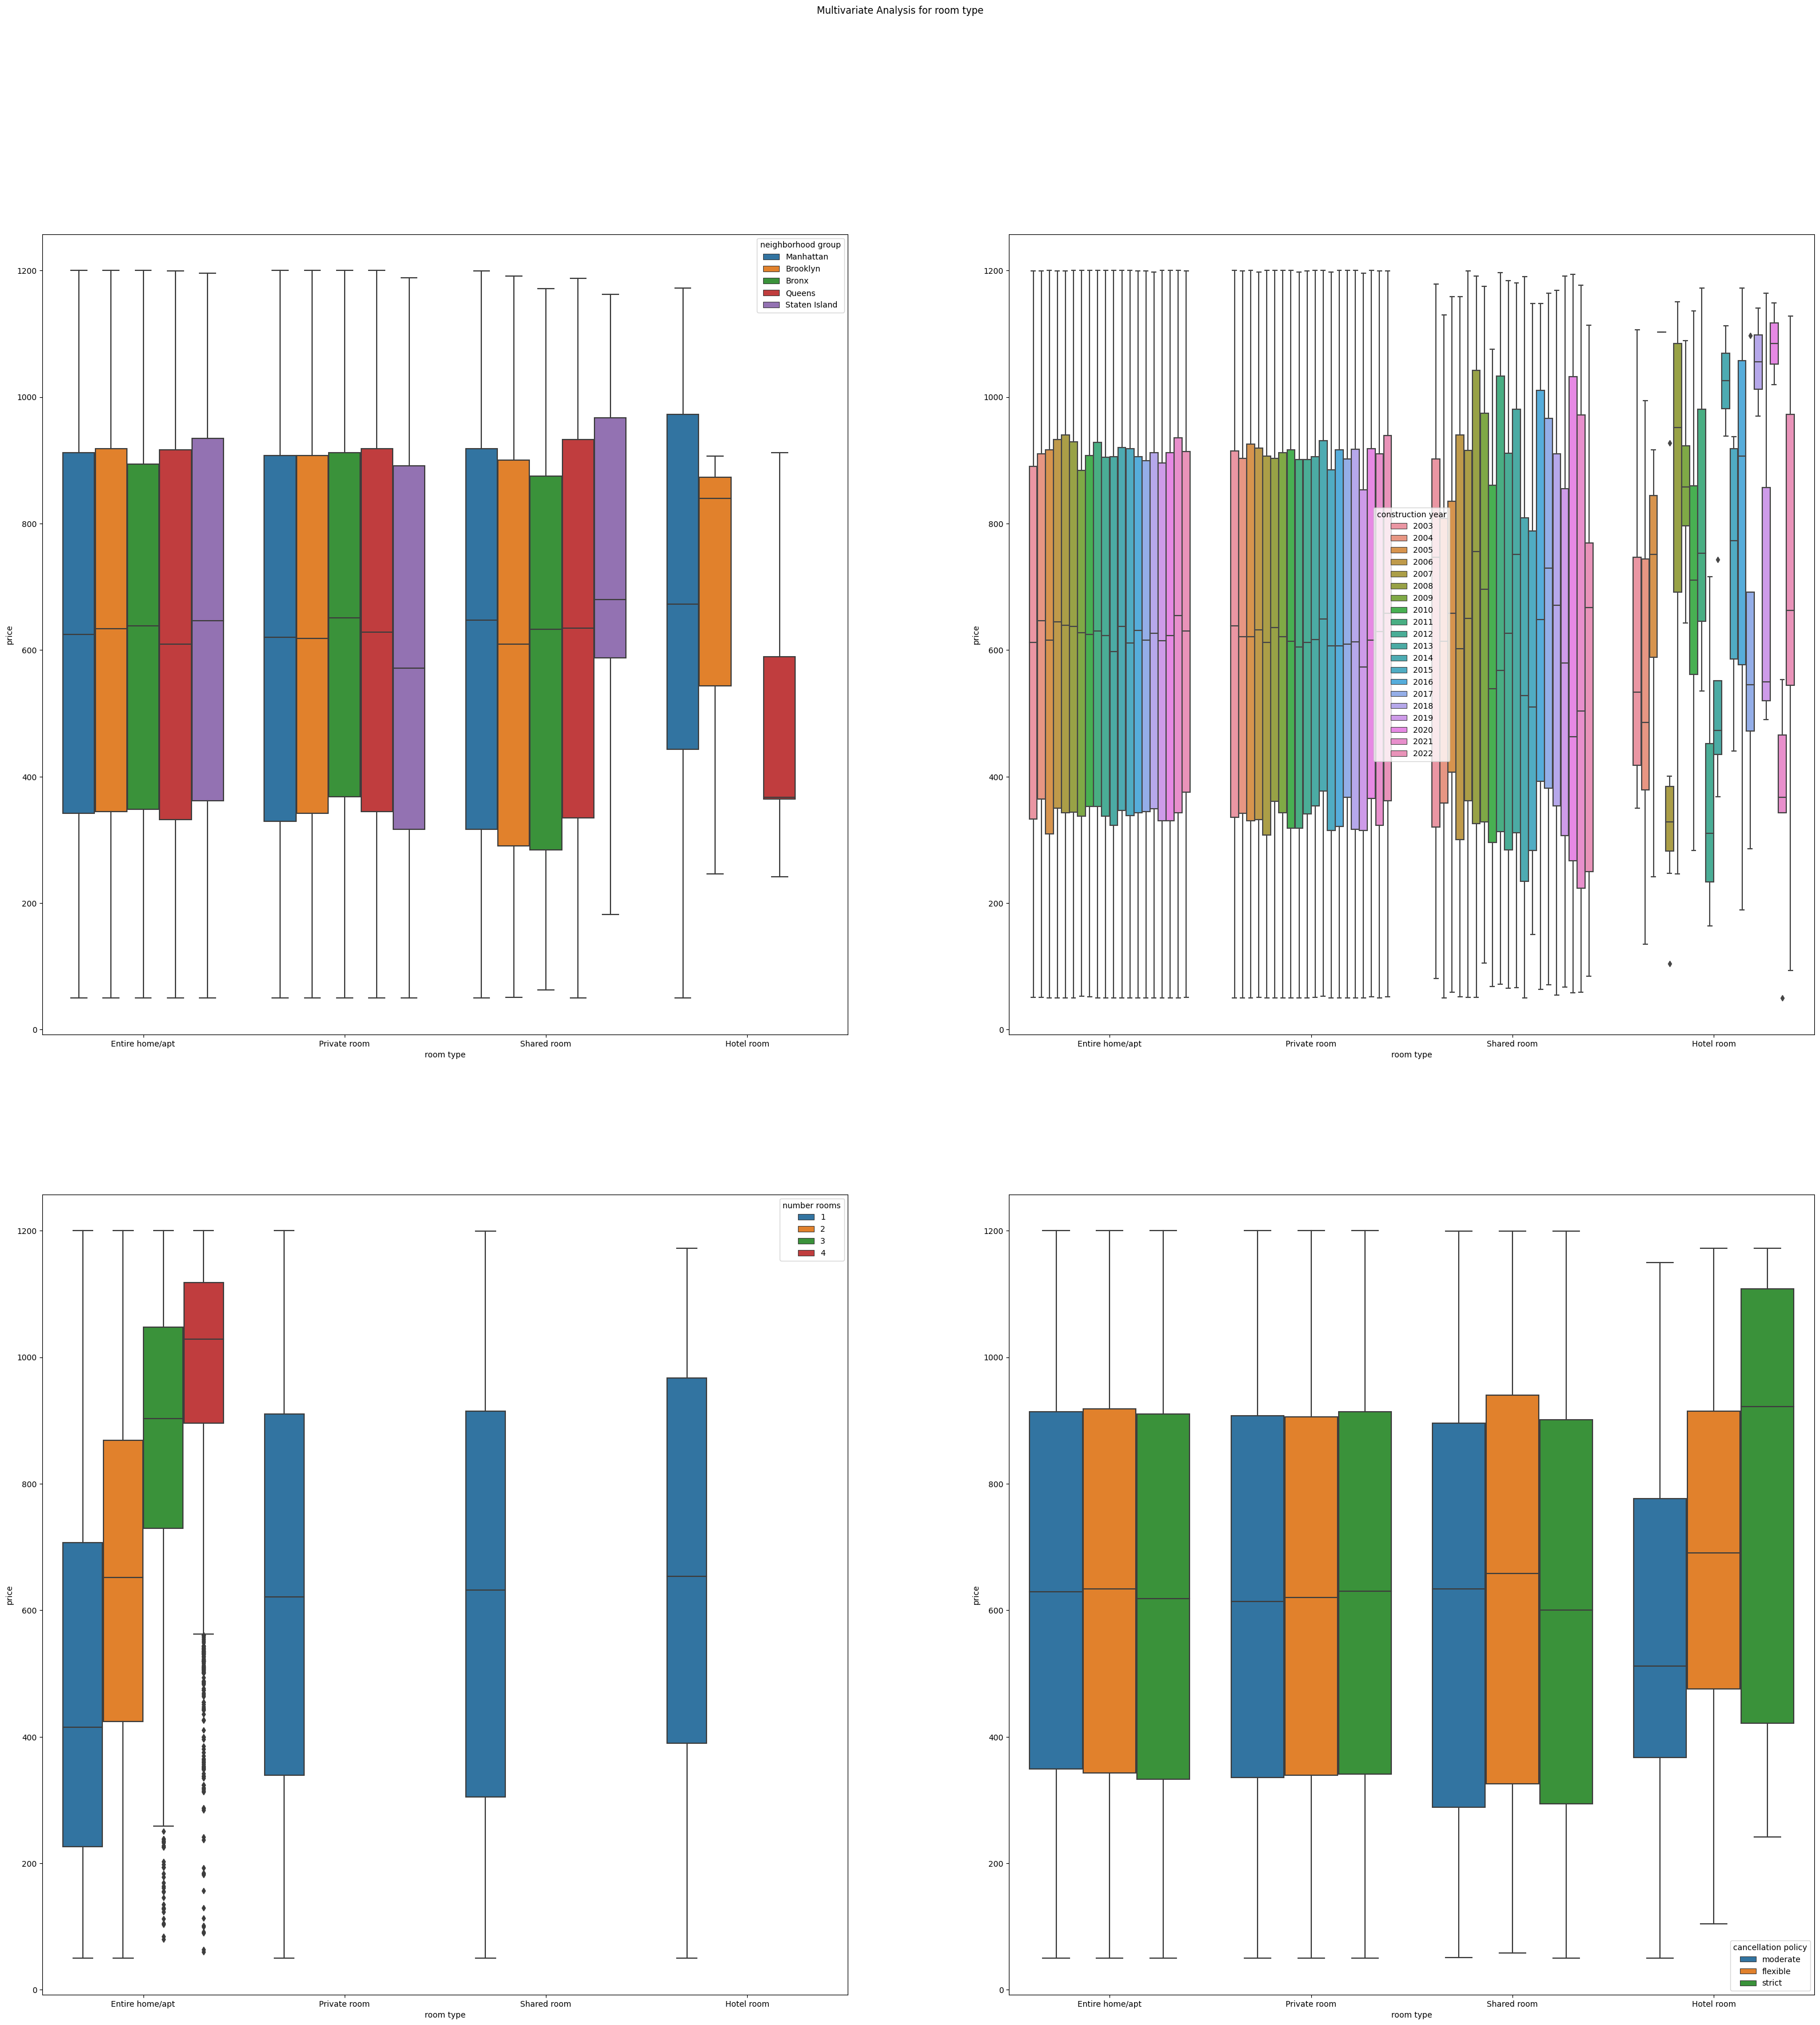

In [43]:
# Your answer goes here
plot_boxes("room type")

_Answer:_
1. The combination of **number rooms** and **room type** yields high variance. As it's evident from the plots above, as the number of rooms increase, the only available room type will be *Entire home/apt*, which results in higher prices in general. Hence, this combination could be used.

2. The combination of **room type** with other features also seems to yield variance and cause change in price values.

#### Multivariate Analysis for Number of Rooms

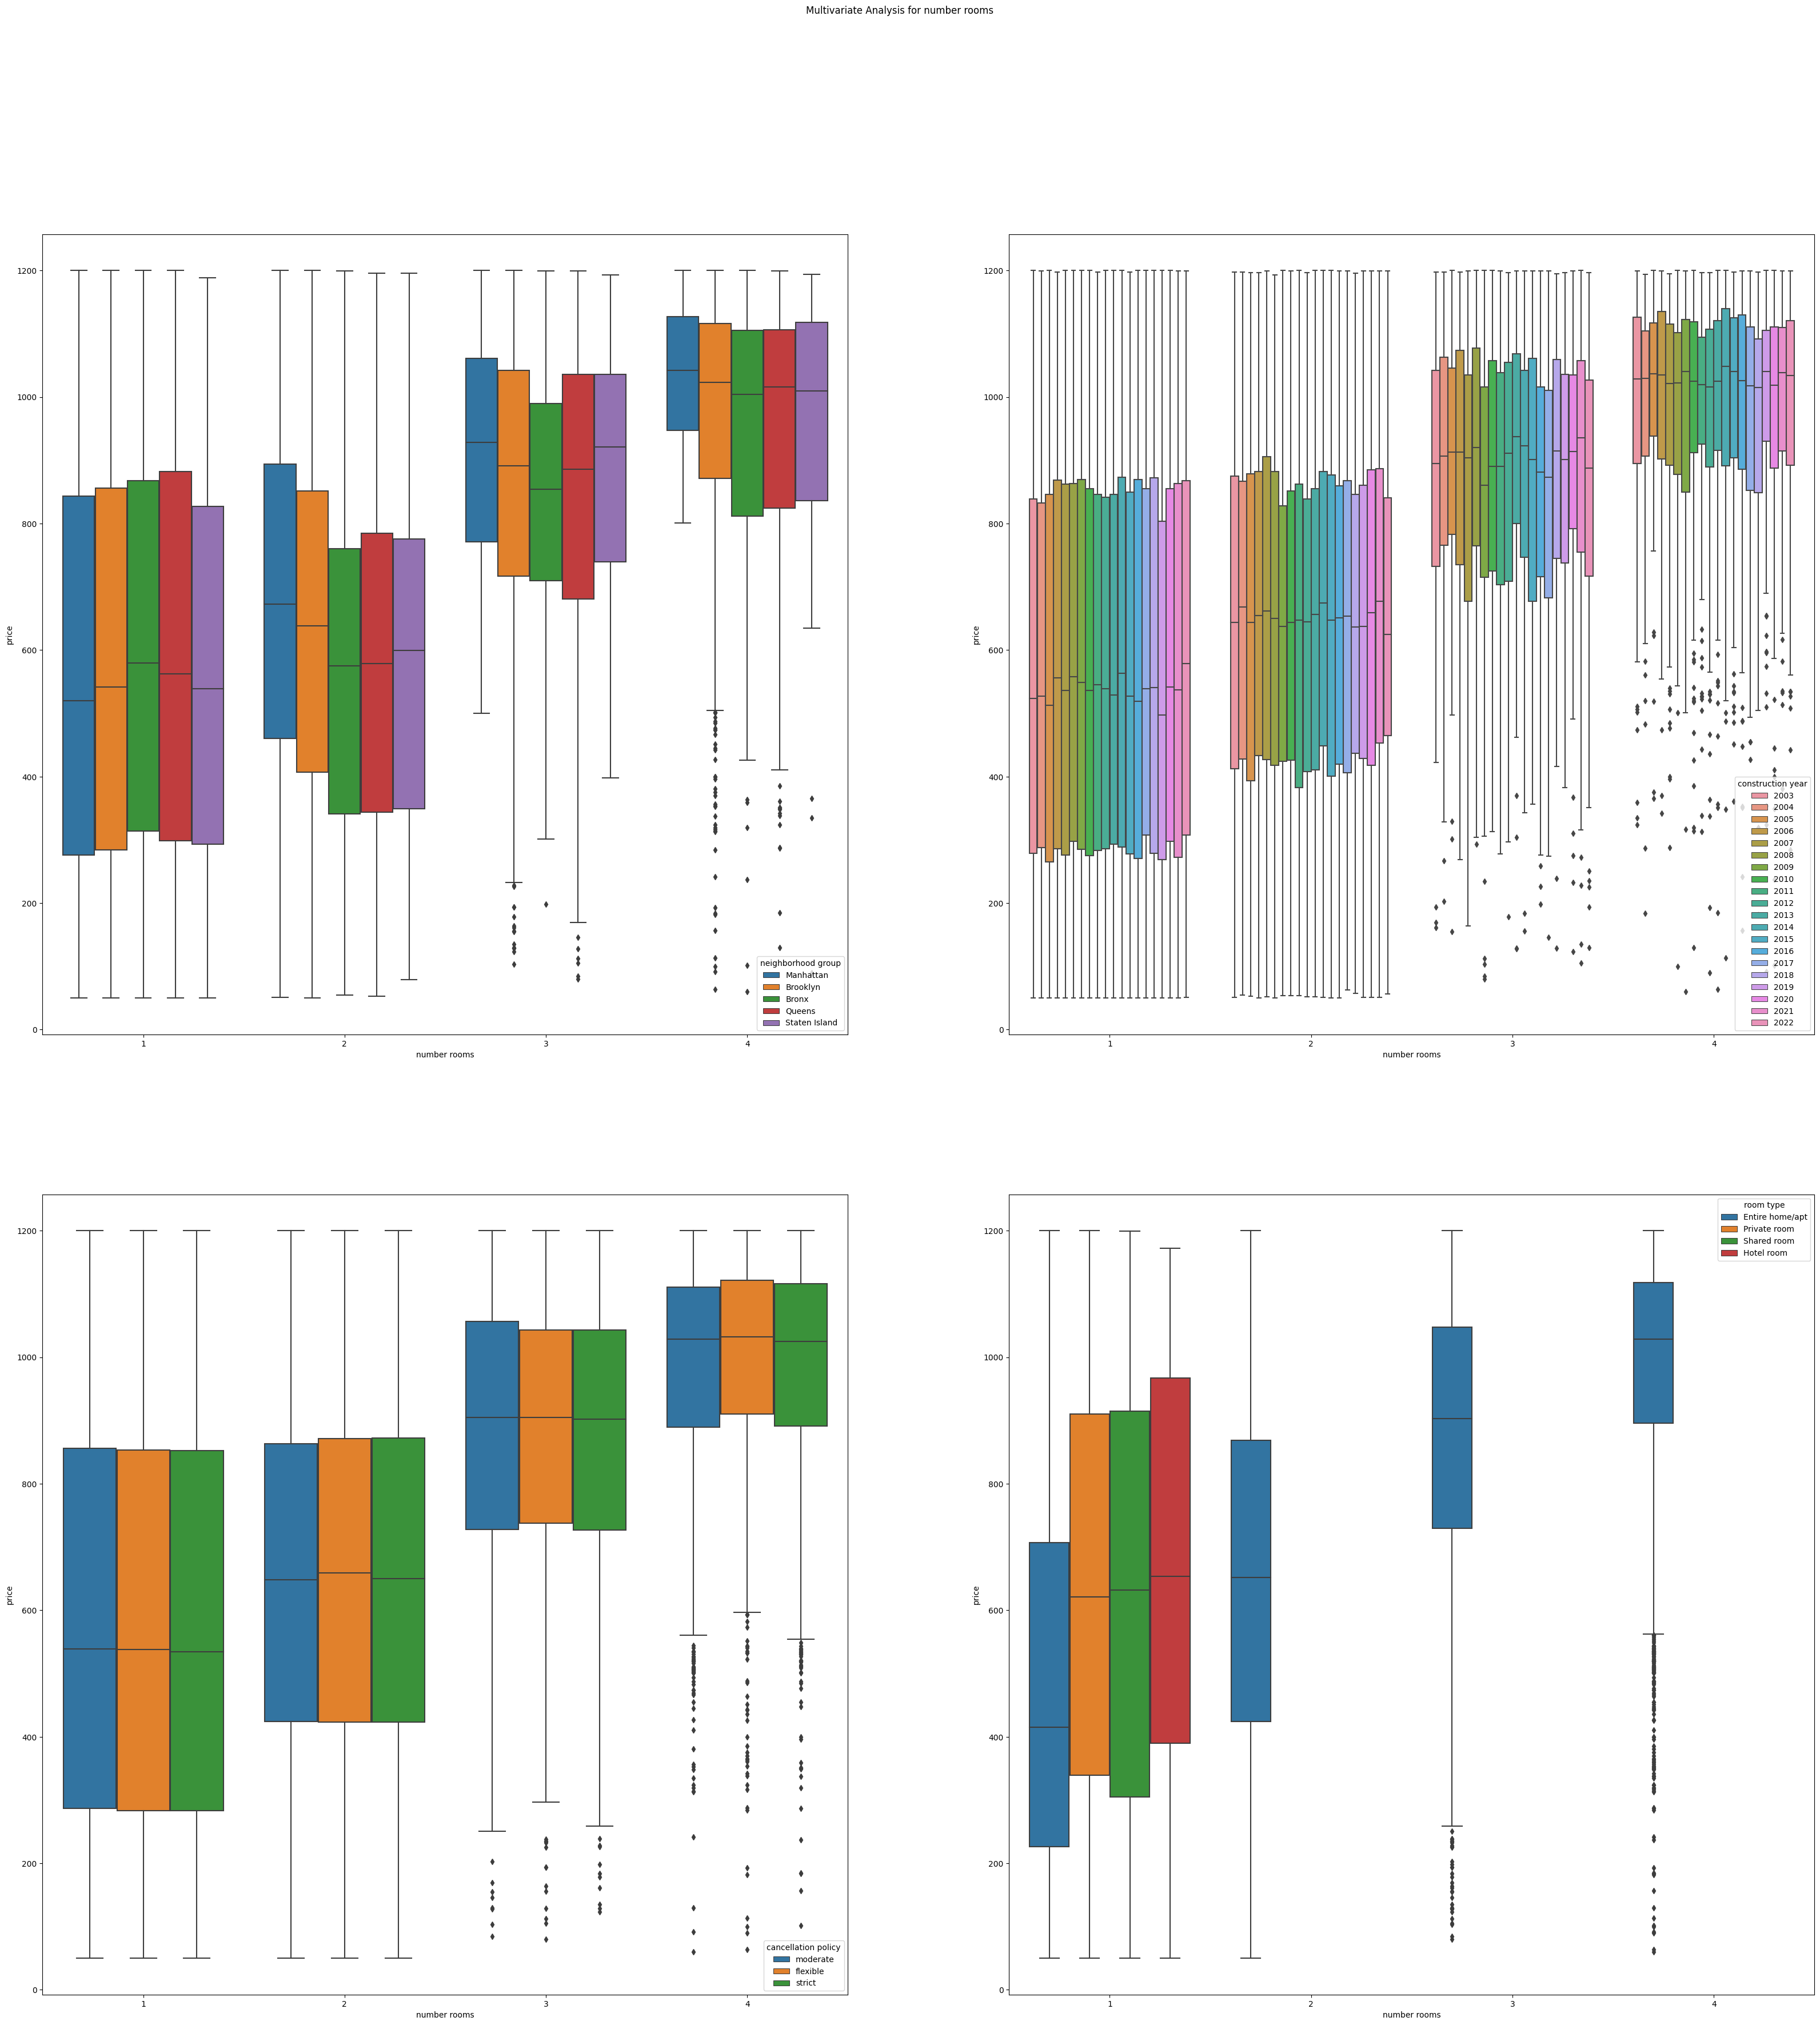

In [44]:
# Your answer goes here
plot_boxes("number rooms")

_Answer:_

The combination of **number rooms** with each of the other features yields a considerable change in the price values. Hence, all these combinations could be considered.

#### Multivariate Analysis for Construction Year

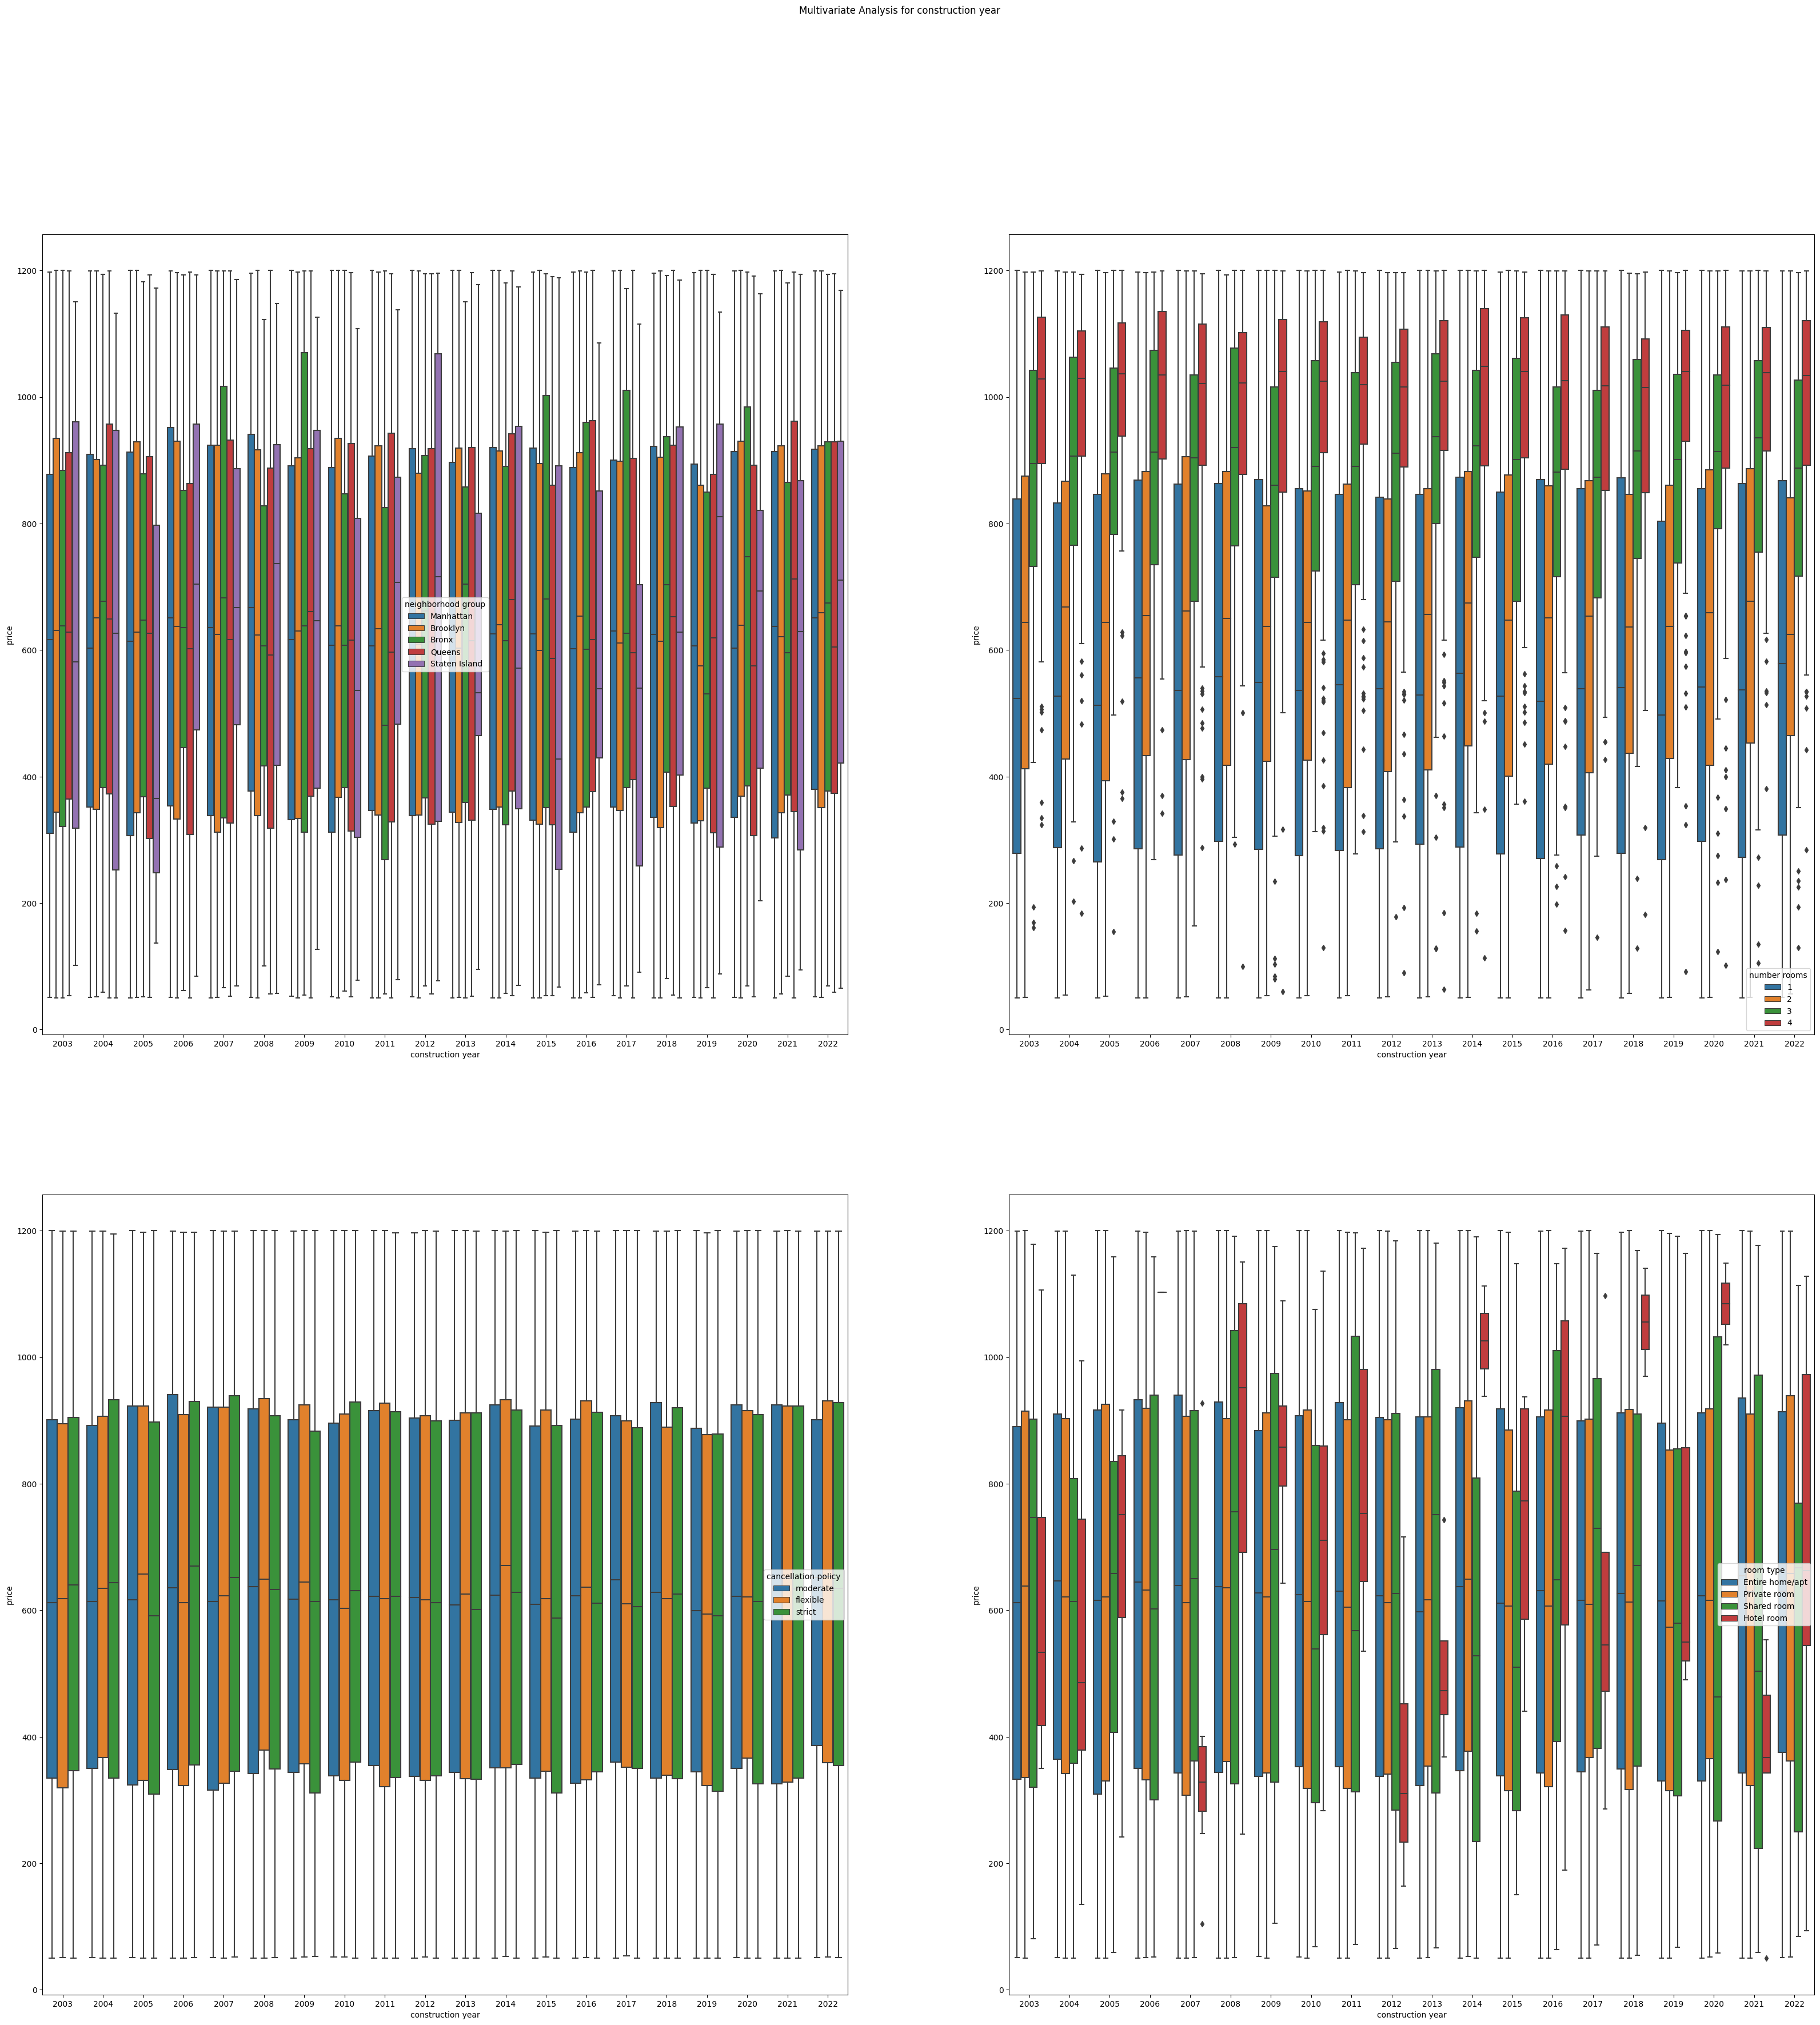

In [24]:
# Your answer goes here
plot_boxes("construction year")

_Answer:_

1. The combination of **number rooms** and **construction year** has high variance. Hence, this combination could be used.
2. For the combination of **room type** and **construction**, the value *hotel room* for **room type** with **neighborhood group** yields high variance. Hence this combination could be used.


### Selection of Variables

Please argue: Which combinations of variables would you consider for pricing your AirBnB?

_Answer:_

By observing the plots drawn above, the cobination of **number rooms** with other features seems to be the most informative. Besides the multivariate analysis for **room type** also indicates that the combination of this feature with other features gives insights about the price value.

**In Summary:**

1. The combination of **number rooms** with the other features, i.e., **room type, neighborhood group, construction year, cancellation policy**

2. The combination of **room type** with the other features, i.e., **number rooms, neighborhood group, construction year, cancellation policy**

## Question 2: Setting the Price

No matter what you have deducted from your analysis, from now on, you will continue only with three features: **The number of rooms, the neighborhood group, and the room type.**

**Enter Toby**: Toby is your long-term friend back from studying at RWTH. While you studied computer science, Toby studied business administration to become a big shot at Wall Street. He currently works in the back office of some swiss credit institute just across the corner from your office. You decide to drop by and get some of his input for your pricing decision. 

Toby proposes to first use comparables pricing to price your apartment. Comparables pricing is an established concept in economics and means that you price your apartment close to similar apartments. 
You will use different techniques to find similar apartments and set a price.

## Baseline

First, you want to set a baseline to compare against. The baseline should always use the average price of all apartments as a recommended price. Evaluate on a test set of 5%. The same test set should also be used later (you can use the random_state argument in scikit learn's train_test_split, but you need to stay consistent for different questions).

In [56]:
# Your answer goes here
compact_df = airbnb_cleaned_df[['number rooms', 'neighborhood group', 'room type', 'price']]
# Set the descriptive and target features
X = compact_df[['number rooms', 'neighborhood group', 'room type']]
y = compact_df['price']
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
# Calculate the average price in order to use as a baseline
baseline = y.mean()
y_test_mean = y_test.mean()
print(f"Baseline (Average Price): {baseline}")
print(f"Test Mean: {y_test_mean}")
# Consider the mean value of the prices of all instances as the prediction
predictions = np.repeat(baseline, X_test.shape[0])
mae_base = mean_absolute_error(predictions, y_test.values)
print(f"Mean Absolute Error: {mae_base}")

Baseline (Average Price): 625.4636797380085
Test Mean: 635.6195314705052
Mean Absolute Error: 286.5057611400047


## Decision Tree

Using a decision tree, you try to price your apartment according to similar apartments. 

In the following, we want to know the price ranges for renting AirBnBs. To use decision trees, you need to discretize prices. We use the following price bins:


- [50, 200]
- (200, 400]
- (400, 600]
- (600, 800]
- (800, 1000]
- (1000, 1200]

We add the attribute "Price_Bins" using the discretization mentioned above for each apartment. For example, if an apartment costs 404, it is put into the bin (400, 600].

In [46]:
# Your answer goes here
bins = [50, 200, 400, 600, 800, 1000, 1200]
price_bins = pd.cut(compact_df['price'], bins)
extended_df = compact_df.copy()
extended_df['Price_Bins'] = price_bins
extended_df.head()

,number rooms,neighborhood group,room type,price,Price_Bins
0,2,Manhattan,Entire home/apt,142,"(50, 200]"
1,1,Manhattan,Private room,620,"(600, 800]"
2,2,Brooklyn,Entire home/apt,368,"(200, 400]"
3,1,Manhattan,Entire home/apt,204,"(200, 400]"
4,1,Brooklyn,Private room,71,"(50, 200]"


Consider the extended dataset from the previous task. Use 'number rooms,' 'room type,' and 'neighborhood group' as descriptive features and "Price_Bins" as the target feature. Create a test and training set like before.

In [47]:
# Your answer goes here
X_ext = extended_df.drop(columns=['price', 'Price_Bins'])
y_ext = extended_df['Price_Bins']
# Convert features to string type for future usage (one-hot encoding)
X_ext = X_ext.astype(str)
y_ext = y_ext.astype(str)
# Random state used as before, so that the train and test sets are split as before
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_ext, y_ext, test_size=0.05, random_state=42)

Generate a decision tree in which the minimum number of samples for splitting is ten and use entropy. What is the system's entropy?

Note: For this task, you must use the p_decision_tree library.

In [48]:
# Your answer goes here

# Prepare the descriptive and target features
descriptive_features = X_ext.columns
data_descriptive = X_train_ext.values
data_label = y_train_ext.values

# Calling DecisionTree constructor (the last parameter is criterion which can also be "gini")
decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")

# Here you can pass pruning features (gain_threshold and minimum_samples)
decisionTree.id3(0, 10)

# Visualizing decision tree by Graphviz
dot = decisionTree.print_visualTree( render=True )

print("System entropy: ", format(decisionTree.entropy))

System entropy:  2.5850442000604823


What is the first feature the decision tree splits on?

_Answer:_ **number rooms** is the first feature on which the decision tree splits.

Since it doesn't make sense to set a price range for renting a room, we need to fix a price. For simplicity, we use the means of the bins, i.e., 125, 300, 500, 700, 900, and 1100. For example, if a room were categorized in the bin (200, 400], it would have the price of 300.

What prices are possible given your decision tree for:

- Manhattan, 1-room, Private room
- Staten Island, 1-room, Shared room

_Answer:_

1. For the first case, i.e. *Manhattan, 1-room, Private room*, the proposed price of the decision tree lies in bin **(400, 600]**; therefore, we consider the price equal to **500**.

2. For the second case, i.e. *Staten Island, 1-room, Shared room*, the proposed price of the decision tree lies in bin **(600, 800]**; therefore, we consider the price equal to **700**.


What is the proposed price of the decision tree for our apartment? Store it in a variable for later usage.

In [49]:
# Your answer goes here
# Manhattan, 2-room, Apartment
# Lies in bin (600, 800]; therefore, we consider the price equal to 700
our_apt_pred = 700

Error: no "view" mailcap rules found for type "application/pdf"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'output/visualTree.gv.pdf'


To evaluate how good our decision tree is for determining price categories, we want to measure the error of the predictions on the test set. To do so, the IDS team provided you helper functions below.

In [18]:
import pydotplus
import networkx

def get_name_value_dict(graph):
    id_label_dict = {}
    root = decisionTree.root
    visited = set() # Set to keep track of visited nodes of graph.

    def dfs(visited, graph, node):#function for dfs 
        id_label_dict[node.name] = node.value
        if node not in visited:
            if node.next:
                id_label_dict[node.next.name] = node.next.value
            visited.add(node)
            if node.childs:
                for child in node.childs:
                    if child is not None:
                        dfs(visited, graph, child)
            elif node.next:
                if node.next.childs:
                    for child in node.next.childs:
                        if child is not None:
                            dfs(visited, graph, child)
    dfs(visited, decisionTree, root)
    return id_label_dict

def get_predictor(tree):
  id_label_dict = get_name_value_dict(tree)
  dotplus = pydotplus.graph_from_dot_data(tree.source)
  G = networkx.nx_pydot.from_pydot(dotplus)
  root = [n for n,d in G.in_degree() if d==0][0]
  paths = []
  for node in G:
      if G.out_degree(node)==0: #it's a leaf
          paths.append(networkx.shortest_path(G, root, node))
  new_paths = []
  for path in paths:
      for name, value in id_label_dict.items():
          path = ([p.replace(name, value) for p in path])
      new_paths.append(path)
  predictor = {}
  for path in new_paths.copy():
    target = path[-1]
    classification = tuple(path[:-1])
    predictor[classification] = target
  return predictor

def get_prediction_features(predictor):
    features = set()
    for key in predictor:
        i = 0
        while i <= len(key)-2:
            features.add(key[i])
            i +=2
    return features
            
def get_predicted_bin(instance, features, predictor):
  feature_values = {}
  for feature in features:
      feature_values[feature] = instance[feature]
  possible_paths = predictor.keys()
  i=0
  while i<=len(feature_values):
    attribute = [path[i] for path in possible_paths][0]
    if attribute in predictor.values():
      break
    feature_value = feature_values[attribute]
    candidates = []
    for el in possible_paths:
      if str(el[i+1]) == str(feature_value):
        candidates.append(el)
    possible_paths = candidates.copy()
    i+=2
  return predictor[possible_paths[0]]



### Dot is your visual decision tree. Adjust the naming if needed
predictor = get_predictor(dot)
features = get_prediction_features(predictor)

To predict the price bin for each instance of your test set, apply the function get_predicted_bin using the variables *predictor* and *features* provided above.

In [19]:
# Your answer goes here
import re

# Convert the test dataframe to a list of records of type dictionary
test_records_X = X_test_ext.to_dict('records')
test_records_y = y_test_ext.values

print(f'Total Count: {len(test_records_X)}')
misprediction_count = 0
predicted_values = []
# Predict the price on the test data using the decision tree
for index, instance in enumerate(test_records_X):
    # Find the predicted value of the decision tree for an instance in the test dataset
    predicted = get_predicted_bin(instance, features, predictor)
    # Get the real price value of that instance
    real_value = test_records_y[index]
    if predicted != real_value:
        misprediction_count += 1
    # Extract the lower and higher bounds of the interval
    interval_values = re.findall('[0-9]+', predicted)
    interval_values = list(map(lambda value: int(value), interval_values))
    # Calculate the mean value of the interval: (lower_bound + upper_bound) / 2
    interval_mean = sum(interval_values) / 2
    predicted_values.append(interval_mean)
    # print(f'Predicted: {predicted}, Real: {real_value}')

print(f'Misprediction Count: {misprediction_count}')

Total Count: 3543
Misprediction Count: 2698


You predicted a price range for AirBnBs in your test set. However, since you cannot enter a price range for renting an apartment, we have to map the range of bins to one value. To do so, we use the mean of bins, as explained before, to predict the price. Given that, compute the mean absolute error between the prediction from the decision tree and the real price provided in the dataset. What is the mean absolute error?

In [20]:
# Your answer goes here
predicted_values = np.array(predicted_values)
# Calculate the mean absolute error between the predicted price values and their real values
mae_dec_tree = mean_absolute_error(predicted_values, y_test.values)
print(f"Mean Absolute Error for Decision Tree: {mae_dec_tree}")

Mean Absolute Error for Decision Tree: 269.7533163985323


## Clustering

Another way to do comparables pricing is to find similar apartments using clustering. Each calculated cluster represents one or more similar apartments in the dataset. For each cluster, you calculate the mean price as a representative price. To predict the price for new apartments, you assign them to an existing cluster and give the mean price as prediction.

Use the same features you used in the decision tree for the clustering as well (**number rooms, neighborhood group, room type**), and remember that your dataset is still split into a training and test set.

In this task, you will use the k-means algorithm.
*Note: To keep results comparable, please use 100 for random state and n_init when initializing the clustering algorithm. Also, remember to use the same test and training set as in the previous tasks to compare performances.*

### Encoding 

K-means tries to calculate the distance between different data points. Since some of the features you want to use are not numeric, apply one-hot encoding to be able to use distance measures. Use the preprocessing module of sklearn to prepare your dataset for clustering.

In [21]:
X_train_ext.head()

,number rooms,neighborhood group,room type
14511,1,Manhattan,Private room
32127,2,Brooklyn,Entire home/apt
34402,1,Manhattan,Private room
51675,1,Queens,Shared room
69390,4,Brooklyn,Entire home/apt


In [22]:
# Your answer goes here

encoder = OneHotEncoder(categories='auto')
# Fit the encoder to training set
encoder.fit(X_train_ext)
# Apply the one hot encoder
X_train_enc = encoder.transform(X_train_ext).toarray()
print('Transformed by One-hot Encoding: ')
"""
Each array for each instance includes 13 elements because there are 4 distinct values for 'number rooms',
5 distinct values for 'negihborhood group', 4 distinct values for 'room type'
"""
print(X_train_enc)

Transformed by One-hot Encoding: 
[[1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]]


### Choosing number of clusters

In k-means, the number of wanted clusters is a parameter one can decide on. Since this is information you do not have at this time, you choose to use the data to decide.

You cluster on the training dataset by using `k` number of clusters where `k` is between 4 and 15. Since you are interested in the price, for each clustering, you calculate the **standard deviation of the mean prices for the clusters**. Therefore, for each clustering:
1. Calculate the mean price for each of the resulting clusters.
2. Calculate the standard deviation of the mean prices calculated in 1.

Plot a diagram where on the `x-axis` you will have the *number of clusters used* and on the `y-axis` the *standard deviation of the means*.

In your opinion, which amount of clusters makes more sense? Explain your answer.

### **Inquiries/Considerations:**
1. Between 4 and 15 (included or not)

In [25]:
# Your answer goes here

# Initialize values for later usage
min_clusters = 4
max_clusters = 15
cluster_std = {}
target_model = None
target_model_cluster_means = None
sum_of_squared_distances = []
for num_clusters in range(min_clusters, max_clusters):
    print(f"K-Means Clustering with {num_clusters} Clusters")
    # Train the K-Means clustering with a specific number of clusters
    kmeans = KMeans(n_clusters=num_clusters, n_init=100, random_state=100).fit(X_train_enc)
    # Get the indices of the instances/smaples assigned to each cluster (with key being the cluster number and the value being the array of sample indices)    
    # Format: {cluster: array of indices} -> {0: [1, 4, 5, ...], 1: [0, 2, ...], ...}
    cluster_indices = {cluster_num: np.where(kmeans.labels_ == cluster_num)[0] for cluster_num in range(kmeans.n_clusters)}
    # Get price values corresponding to the samples of each cluster
    cluster_prices = {cluster_num: y_train.values[cluster_indices[cluster_num]] for cluster_num in cluster_indices}
    # Get the one-hot encoded samples assigned to each cluster
    cluster_samples = {cluster_num: X_train_enc[cluster_indices[cluster_num]] for cluster_num in cluster_indices}
    # Keep track of sum of squared distances between cluster centroids and their samples
    sum_of_squared_distances.append(kmeans.inertia_)
    # Calculate and assign the mean value of prices for each cluster
    cluster_means = {}
    for cluster_num in cluster_prices:
        cluster_means[cluster_num] = cluster_prices[cluster_num].mean()
    price_std = np.array(list(cluster_means.values())).std()
    # Keep track of number of clusters used and the standard deviation of the mean values of the prices
    cluster_std[num_clusters] = price_std
    # Saving the model and its cluster samples with 9 clusters for the next task
    if num_clusters == 9:
        target_model = kmeans
        target_model_cluster_means = cluster_means
        

K-Means Clustering with 4 Clusters
K-Means Clustering with 5 Clusters
K-Means Clustering with 6 Clusters
K-Means Clustering with 7 Clusters
K-Means Clustering with 8 Clusters
K-Means Clustering with 9 Clusters
K-Means Clustering with 10 Clusters
K-Means Clustering with 11 Clusters
K-Means Clustering with 12 Clusters
K-Means Clustering with 13 Clusters
K-Means Clustering with 14 Clusters


### **A Peripheral Explanatory Analysis (Elbow Method)**

In addition to computing the standard deviation of the mean price values when different numbers of clusters are used as a way of finding the best number of clusters, finding the *sum of squared distances (inertia)* of the cluster points to their centroids could also be a useful and insightful analysis for obtaining the best number of clusters.

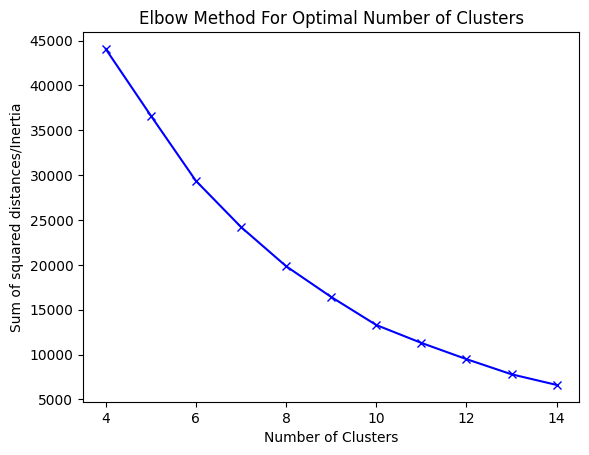

In [26]:
plt.plot(range(min_clusters, max_clusters), sum_of_squared_distances, '-bx')
plt.xlabel("Number of Clusters") 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

{4: 2.5076433222529904, 5: 12.377073515201985, 6: 23.71706722532128, 7: 82.71799284916645, 8: 73.2819836093347, 9: 106.31576819010023, 10: 145.28587743262472, 11: 139.51780983948248, 12: 154.3694491386941, 13: 149.30083301294596, 14: 166.80044522683087}


<AxesSubplot:xlabel='num_clusters', ylabel='std'>

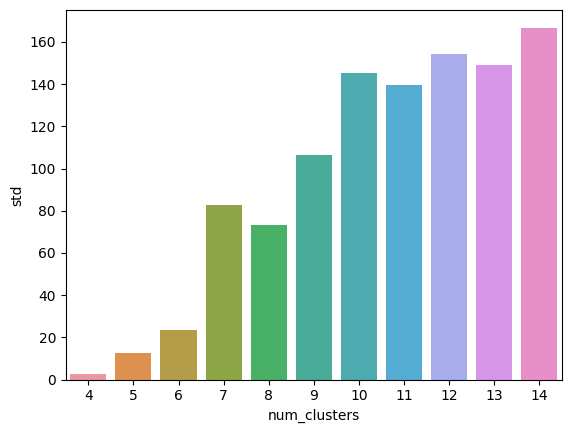

In [27]:
print(cluster_std)
cluster_std_df = pd.DataFrame({'num_clusters': cluster_std.keys(), 'std': cluster_std.values()})
sns.barplot(x='num_clusters', y='std', data=cluster_std_df)

In [ ]:
## Test Cell
# kmeans = KMeans(n_clusters=4, n_init=100, random_state=100).fit(X_train_enc)
# print(kmeans.labels_)
# cluster_indices = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}
# print(mydict[0])
# print(y_train.values[indices])
# cluster_prices = {cluster_num: y_train.values[cluster_indices[cluster_num]] for cluster_num in cluster_indices}
# print(cluster_prices)
# cluster_samples = {cluster_num: X_train_enc[cluster_indices[cluster_num]] for cluster_num in cluster_indices}
# centroids = kmeans.cluster_centers_[0]
# cs = cluster_samples[0]
# print(cs)
# print(centroids)
# print(np.sum((cs - centroids)**2, axis=1))

_Answer:_

In order to answer this question, it's best that we refer to an important concept in K-Means clustering:
-  The points **within a cluster** should have **minimum distance** to each other.
-  The points from **different clusters** should have **maximum distance** to each other.

Following this, we observe that K-Means clustering with **14 clusters** results in the **highest standard deviation** across the mean price values (which is satisfactory); therefore, we can conclude that the samples assigned to different clusters are dissimilar. Besides, considering the elbow method, we can conclude that the samples in each cluster are similar to each other since their sum of squared distances to their centroids are minimal compared to other numbers of clusters used for clustering.

**Conclusion**: Using **14 clusters** makes more sense.

**Note:** No matter the conclusion made in the previous task, from now on, you use the clustering model with **9 clusters** for predicting the price for your apartment and evaluating the clustering technique.

### Pricing your apartment

To predict the price for your apartment, calculate in which cluster your apartment would be and use the mean value of the cluster as a possible price.

In [48]:
# Your answer goes here

# Create dataframe for our apartment
apt_df = pd.DataFrame({'number rooms': '2', 'neighborhood group': 'Manhattan', 'room type': 'Entire home/apt'}, index=[0])
# Apply one-hot encoding to our apartment's dataframe
apt_df_enc = encoder.transform(apt_df).toarray()
# Get the cluster label/number for our apartment
prediction = target_model.predict(apt_df_enc)
prediction = prediction[0]
print(f"Model with 9 clusters predicts the apartment to be assigned to cluster {prediction}")
print(f"Cluster {prediction} Mean Value: {cluster_means[prediction]}")

Model with 9 clusters predicts the apartment to be assigned to cluster 7
Cluster 7 Mean Value: 471.6347325102881


### Evaluating clustering

You want to evaluate how well your clustering worked. In your case, two things can be evaluated:

1.   Whether the clustering technique can group similar apartments together
2.   Whether other people determine the price of their apartment as you did, meaning whether similar apartments get a similar price

You are going to evaluate the clustering technique visually. The IDS team provides you with the following fancy code that reduces your input to two dimensions.

In [55]:
import umap.umap_ as umap

x_train = pd.concat([X_train_ext, y_train], axis=1)
#Preprocessing numerical
full_data = x_train # use the train dataset here
numerical = full_data.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = sklearn.preprocessing.PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components,
                                                fit1._initial_alpha, fit1._a, fit1._b,
                                                fit1.repulsion_strength, fit1.negative_sample_rate,
                                                200, 'random', np.random, fit1.metric,
                                                fit1._metric_kwds, False, {}, False)

# Extracting the resulting dimensions
dimension1 = embedding[0].T[0]
dimension2 = embedding[0].T[1]

/opt/conda/lib/python3.9/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  warn(


Create a scatter plot from the two dimensions and use the cluster labels for coloring the data points. Use the train set for the visualization. Discuss the result.

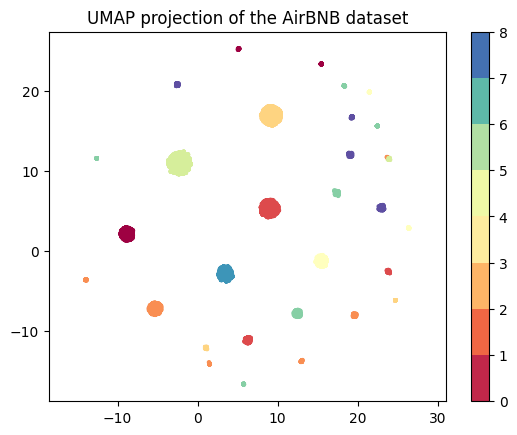

In [56]:
# Your answer goes here
plt.scatter(
    dimension1,
    dimension2,
    c=target_model.labels_,
    cmap='Spectral', s=5
)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(9)).set_ticks(np.arange(9))
plt.title('UMAP projection of the AirBNB dataset', fontsize=12);

_Answer:_

### **Considerations/Inquries**

Our analysis of the embedding scatterplot results in the following statement:

1. Some of the clusters appear in different places along the embedding scatterplot; therefore, this could lead to different prediction results for the instances with the same cluster label. However, the density of some of the similar clusters are almost high, i.e., similar instances within these clusters get similar prediction results.

2. Clusters are clearly distinguishable, so it seems that instances from different clusters are dissimilar to other clusters (instances from different clusters are distant).

We next evaluate whether similar apartments (considering the attributes we chose) get similar prices. To do this, we use our test set. Assign each apartment of the test set to the nearest centroid. Predict the price of the apartments in the test set by taking the mean price of the cluster they was assigned to. Calculate the mean absolute error between the predicted and real prices.

### **Considerations/Inquiries**

1. Consider finding Euc dist of the test samples to the centroids inestead of predicting


In [66]:
# Your answer goes here

# Apply one-hot encoiding to test dataset
X_test_enc = encoder.transform(X_test_ext).toarray()
predictions = target_model.predict(X_test_enc)
# Map each of the 
map_to_cluster_mean = lambda x: target_model_cluster_means[x]
# Map each prediction to the mean of the cluster it represents
y_pred = np.vectorize(map_to_cluster_mean)(predictions)
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
print(f"Mean Absolute Error: {mae[0]}")

Mean Absolute Error: 273.96190169701214


### Final comments on the price prediction

Please compare the three approaches used for determining the price. Do they provide a good way of determining the price?

_Answer:_

#### Comparative Analysis of the Approaches

1. **Baseline**: With this approach, we always use the mean values of prices of all apartments as the predicted value. The *mean absolute error* obtained on the test set using this approach is **286.5057611400047**.

2. **Decision Tree**: After evaluating the decision tree on the test set, we observed that there were 2698 inaccurate predictions out of the 3543 total instances in the test data. We obtained a *mean absolute error* of **269.7533163985323** on the test set using the decision tree.

3. **Clustering**: We used 9 different clusters to group the data in the training set based on the features required, although it appeared not to be the best chocie for the number of clusters as indicated by the analysis of the standard deviation of the mean price values of the centroids and the elbow method. Finally, by assigning the instances in the test set to the nearest centroid and using the mean value of each centroid as the predicted value for each instance, we obtain a *mean absolute error* of **273.96190169701214**.

By comparing the errors we obtained using each of these different approaches, we see that the **baseline method** leads to the highest mean absolute error. the **decision tree**, however, results in the lowest error and could be considered as the best approach compared to the other approaches. the **clustering method** results in an error value in between the baseline and the decision tree.

Note that the errors obtained on the test data for each of these approaches are rather high; therefore, the predictions made by each of these methods are somehow unreliable.

## Question 3: Investigating Price Elasticity

You show your results to Toby, excited about the price suggestions you got from the decision tree and clustering. You decide to take the higher price, which naturally means more income.

However, he points you to one central flaw in your thinking: The number of bookings is not independent of the price. Therefore, you can not just take any price and assume that this will lead to more income than a lower price, as the demand (utilization) for your apartment might decrease. This is called **price elasticity**.

You want to verify what Toby has been telling you. You extracted the utilization column of your dataset by grabbing the available data from AirBnB's calendar (smart!). The utilization values are contained in dataset **AirBnB_utilization.csv**. **Show several graphs investigating price elasticity.** For example, you might plot the utilization in relation to the price and color according to different variable values. 
After you have verified Toby's statements, you want to learn price elasticity from the dataset (the utilization of an apartment given the price, the number of rooms, the room type, and the neighborhood group, i.e., the same features as before). With the learned price elasticity, you want to evaluate which of the proposed prices (decision tree or clustering) is the better choice.

In [ ]:
# Your answer goes here


You will investigate the relationship between price and utilization in this subtask. First, you will train different models and choose the one that best predicts utilization for an apartment. Second, you will evaluate which of the proposed prices of decision tree and clustering prices were better, assuming that your model provides the correct utilization. Third, you will conclude your investigation and provide a pricing decision.

### Learning price elasticity
You want to use different supervised learning techniques to learn price elasticity. You decide on linear regression, SVM, and multilayer perceptrons. However, you have to preprocess the data. Use the features of the neighborhood group, the room type, the number of rooms, and the price to predict the utilization. Split into training and testing data (test size 5%).

Prepare the data set by splitting, one-hot encoding, and normalizing.

In [ ]:
# Your answer goes here


For each technique, use 5-cross-fold validation and assess the performance on the test set. 

#### Regression

Learn a linear regression to predict the utilization of an AirBnB.

In [ ]:
# Your answer goes here


What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here


Show (draw!) the price elasticity for your apartment. 

In [ ]:
# Your answer goes here


#### Linear SVR

Train and evaluate a Linear SVR (Support Vector Regression) model.

In [ ]:
# Your answer goes here


What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here


Show (draw!) the price elasticity for your apartment. 

In [ ]:
# Your answer goes here


#### Learning Non-Linear Relationships

You realize that learning linear relationships only provides limited performance. You want to learn non-linear relationships. First, you will learn non-linear relationships using linear regression and kernels. Second, you will use non-linear kernels in the Support Vector Regression. Third, you will use neural networks.

#### Kernels in Regression

Use a transformation of the price and a regression to incorporate non-linear relationships, as learned in the lecture. You can try different kernel functions, but at least you should use one quadratic kernel.

In [ ]:
# Your answer goes here


What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here


Show (draw!) the price elasticity for your apartment. 

In [ ]:
# Your answer goes here


#### Kernels in SVR

Train and evaluate an SVR (Support Vector Regression) model with different, non-linear kernels. You can limit the size of your training set to 25000 samples to make the problem feasible in computation time.

In [ ]:
# Your answer goes here


What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here


Show (draw!) the price elasticity for your apartment. 

In [ ]:
# Your answer goes here


What is your conclusion on using kernels?

_Answer:_



#### Neural Network

Learn a neural network (multilayer perceptron) to predict the utilization of an AirBnB.

In [ ]:
# Your answer goes here


What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here


Show (draw!) the price elasticity for your apartment. 

In [ ]:
# Your answer goes here


### Profit discrepencies when incorporating price elasticity

Use the model that best captures price elasticity on the testing set. You can assume that this model accurately captures price elasticity, i.e., is the ground truth. What is the better of the two proposed prices? Is the better price the optimal price?

In [ ]:
# Your answer goes here


_Answer:_



# Question 4: Conclusion

Summarize your findings and discuss limitations.

_Answer:_ 

